# Laboratorium 2 - MOwNiT2

## Szybka transformata Fouriera (FFT)

In [3]:
import numpy as np

### Zadanie 1.

Napisz w dowolnym języku zwyczajną (wolną) dyskretną transformatę Fouriera.

In [4]:
def slow_DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Sprawdzenie czy implementacja poprawna.

In [8]:
x = np.random.random(512)
np.allclose(np.fft.fft(x), slow_DFT(x))

True

### Zadanie 2.

Wykorzystaj implementację z zadania 1. do napisania szybkiej wersji transformaty (używając pomysłu z algorytmu Cooleya-Tukeya).

In [15]:
def FFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N <= 16:
        return slow_DFT(x)
    else:
        x_even = FFT(x[::2])
        x_odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([x_even + factor[:N // 2] * x_odd, x_even + factor[N // 2:] * x_odd])

Sprawdzenie czy implementacja poprawna.

In [16]:
x = np.random.random(512)
np.allclose(np.fft.fft(x), FFT(x))

True

Porównanie czasów.

In [18]:
x = np.random.random(512)
%timeit np.fft.fft(x)
%timeit slow_DFT(x)
%timeit FFT(x)

3.83 µs ± 158 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
10.9 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.58 ms ± 42.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Zadanie 3.

Przetestuj implementację z zadania 2. do wykonania analizy szeregu czasowego:
1. Znajdź dane przedstawiające jakiś szereg czasowy.
2. Załaduj je do programu (polecany: Python + Pandas, ale dowolna metoda jest okej, w tym języki R oraz Julia).
3. Zobacz, czy wykonanie analizy Fouriera na tych danych ma sens -- być może trzeba pogrupować je w równe odstępy (zob: funkcja [resample w pakiecie Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)).
4. Narysuj wykres częstotliwości i postaraj się opisać jaka jest główna składowa.

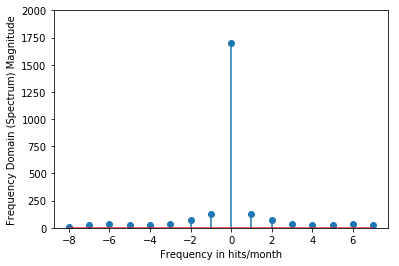

In [51]:
import matplotlib.pyplot as plt 
import numpy as np              
from scipy import fftpack       
import pandas as p

df = p.read_csv('milk_price_201718.csv')
dataset = df.values[0]

X = FFT(dataset)
f_s = 16
freqs = fftpack.fftfreq(len(dataset)) * f_s
fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X)[:len(freqs)])
ax.set_xlabel('Frequency in hits/month')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_ylim(-1, 2000)
plt.show()